In [63]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

from scipy.fftpack import fft
from scipy import signal

## Data Preparation

In [65]:
colNames = ['timeStamp', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3', 'ganglionTime']
data = pd.read_csv("../Data/OpenBCI-RAW-Alpha_10s.csv", sep=',', names=colNames)

In [66]:
data = data[6:]

In [67]:
data.head(5)

,timeStamp,c1,c2,c3,c4,a1,a2,a3,ganglionTime
6,0,-177.74,-187.82,-150.43,-206.58,0.0,0.0,0.0,23:56:45.889
7,1,-187.51,-188.88,-143.97,-202.39,0.0,0.0,0.0,23:56:45.898
8,2,-189.10,-198.42,-140.95,-205.70,0.0,0.0,0.0,23:56:45.898
9,3,-192.11,-196.60,-163.62,-211.47,0.0,0.0,0.0,23:56:45.913
10,4,-192.24,-195.96,-147.83,-212.96,0.0,0.0,0.0,23:56:45.913


## Time Domain Analysis

<IPython.core.display.Javascript object>


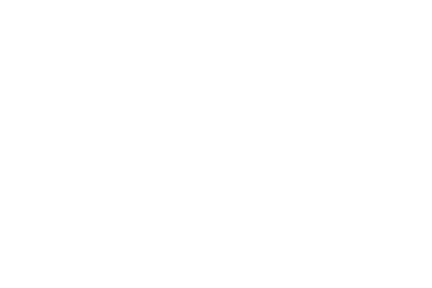

<IPython.core.display.Javascript object>


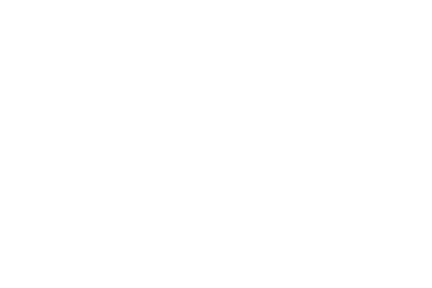

In [68]:
plt.plot(data['c1'])
plt.plot(data['c2'])
plt.plot(data['c3'])
plt.plot(data['c4'])
plt.show()

## Frequency Domain Analysis

In [69]:
# plt.plot(np.log(fft(sig[:20])))
%matplotlib inline

In [70]:
data.shape

(20549, 9)

In [71]:
X = np.array(data.ix[250:, 1:5])
X.shape

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(20305, 4)

In [72]:
X

array([[-186.56, -193.34, -160.14, -213.56],
       [-190.18, -201.63, -157.63, -209.38],
       [-186.16, -197.66, -155.63, -213.65],
       ...,
       [-186.2 , -198.17, -173.82, -211.36],
       [-188.8 , -193.89, -166.79, -206.  ],
       [-185.17, -197.16, -149.67, -197.32]])

Estimate power spectral density using Welch’s method.

Welch’s method computes an estimate of the power spectral density by dividing the data into overlapping segments, computing a modified periodogram for each segment and averaging the periodograms.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html

In [84]:
freq, y = signal.welch(X.T, fs=200.0) 


array([  0.     ,   0.78125,   1.5625 ,   2.34375,   3.125  ,   3.90625,
         4.6875 ,   5.46875,   6.25   ,   7.03125,   7.8125 ,   8.59375,
         9.375  ,  10.15625,  10.9375 ,  11.71875,  12.5    ,  13.28125,
        14.0625 ,  14.84375,  15.625  ,  16.40625,  17.1875 ,  17.96875,
        18.75   ,  19.53125,  20.3125 ,  21.09375,  21.875  ,  22.65625,
        23.4375 ,  24.21875,  25.     ,  25.78125,  26.5625 ,  27.34375,
        28.125  ,  28.90625,  29.6875 ,  30.46875,  31.25   ,  32.03125,
        32.8125 ,  33.59375,  34.375  ,  35.15625,  35.9375 ,  36.71875,
        37.5    ,  38.28125,  39.0625 ,  39.84375,  40.625  ,  41.40625,
        42.1875 ,  42.96875,  43.75   ,  44.53125,  45.3125 ,  46.09375,
        46.875  ,  47.65625,  48.4375 ,  49.21875,  50.     ,  50.78125,
        51.5625 ,  52.34375,  53.125  ,  53.90625,  54.6875 ,  55.46875,
        56.25   ,  57.03125,  57.8125 ,  58.59375,  59.375  ,  60.15625,
        60.9375 ,  61.71875,  62.5    ,  63.28125, 

In [74]:
y = y.T

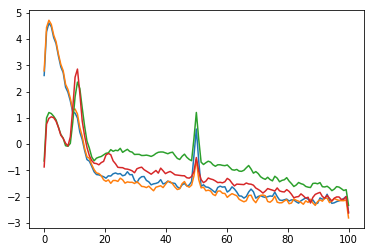

In [75]:
for i in range(y.shape[1]):
    _ = plt.plot(freq, np.log(y[:, i]), label='Channel {}'.format(i+1))

## Spectrogram Analysis

Ganglion Channel Map

<img src="https://raw.githubusercontent.com/OpenBCI/Docs/master/assets/images/ganglion_10-20-positions.png" width="300">

The primary motor cortex, or M1, is one of the principal brain areas involved in motor function. M1 is located in the frontal lobe of the brain, along a bump called the precentral gyrus. 

<br>
<img src=https://qph.fs.quoracdn.net/main-qimg-e16a33548b285152409e11eca5c4df73 width=600>

Frontal Lobe Location

<br>
<img src=https://static1.squarespace.com/static/52f3cf45e4b052b2dabf9b7f/t/52f6c093e4b0b19928bff551/1391902868181/FrontalLobes145753472.jpg?format=1500w width=500>

In [12]:
data.shape

(20549, 9)

In [48]:
X = np.array(data.ix[250:, 1:5])
X.shape

(8550, 4)

In [49]:
sig = X[:, 0]

In [50]:
sig.shape

(8550,)

#Application 

In [ ]:
from scipy.signal import find_peaks 
c_max_index = argrelextrema(data.values, np.greater, order=5)
plt.plot(data)
plt.scatter(c_max_index[0],data[c_max_index[0]],linewidth=0.3, s=50, c='r')

### Channel 1

In [ ]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [49]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

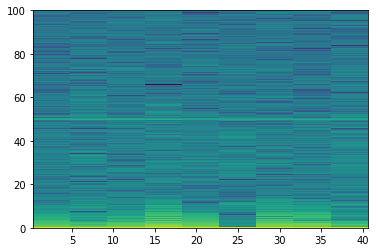

In [51]:
%matplotlib inline
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

### Channel 2

In [52]:
sig = X[:, 1]

In [53]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [54]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

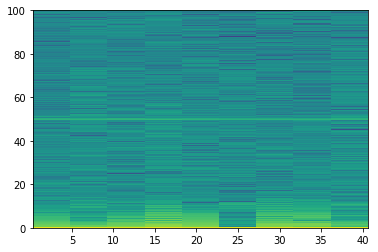

In [55]:
%matplotlib inline
_ = plt.specgram(sig, NFFT=1024, Fs=200)


### Channel 3

In [29]:
sig = X[:, 2]

In [46]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [45]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

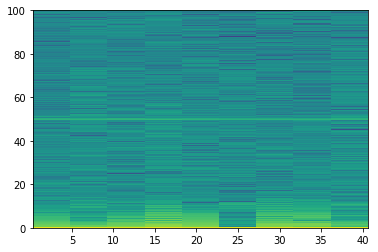

In [56]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

### Channel 4

In [58]:
sig = X[:, 3]

In [59]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [60]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

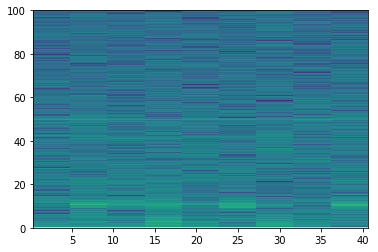

In [61]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

#### As expected, there is significant activity in channel 1 and 2, 30 seconds into the experiment. These channels capture EEG signals in the frontal lobe of the brain, which is associated with motor activity (leg movement). 

- https://www.quora.com/What-part-of-the-brain-controls-leg-movement


#### These waves are in the alpha-beta range since "the subjects were actively engaged in a task (alert), but the task was simple and likely kind of boring (relaxed)"

- https://biology.stackexchange.com/questions/43284/brain-wave-and-motor-movement-correlation